<a href="https://colab.research.google.com/github/plaban1981/Langchain_usecases/blob/main/Nvidia's_NeMo_Guardrails.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

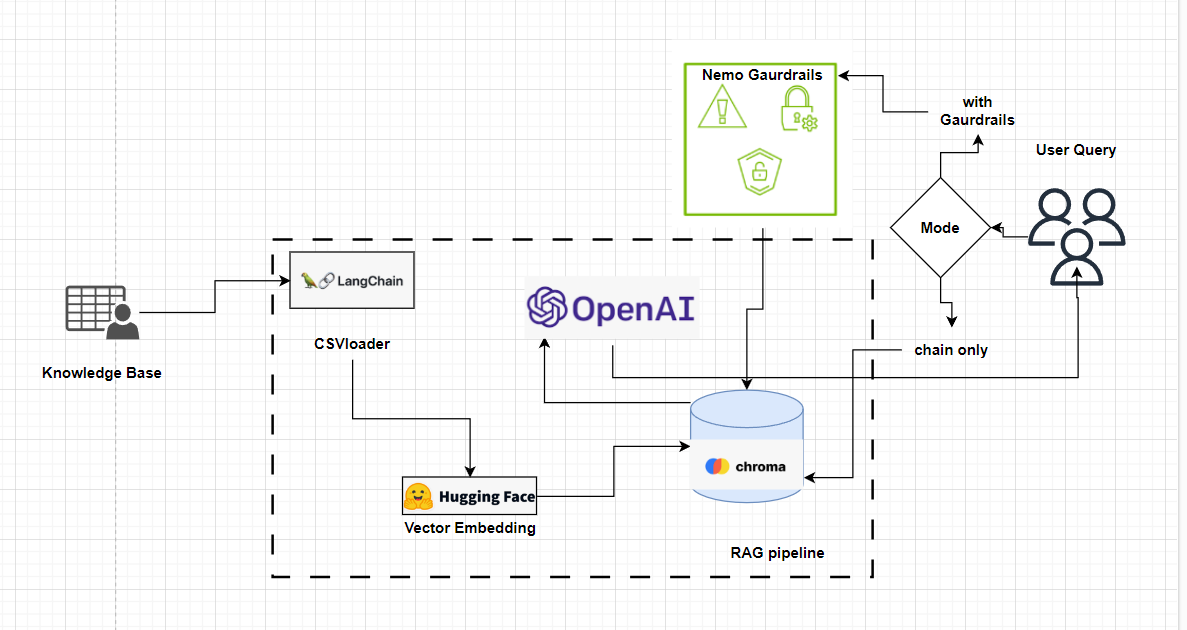

##Nvidia's NeMo Guardrails

It is a new library for building conversational AI / chatbots.

A guardrail is a semi or fully deterministic shield that use against specific behaviors, conversation topics, or even to trigger particular actions (like calling to a human for help).

We can use NeMo Guardrails for safety/topic guidance, deterministic dialogue, retrieval augmented generation (RAG), and conversational agents.

It helps to give guidelines to a chatbot.

Main focus of thios library is to help deploy chatbots safely.

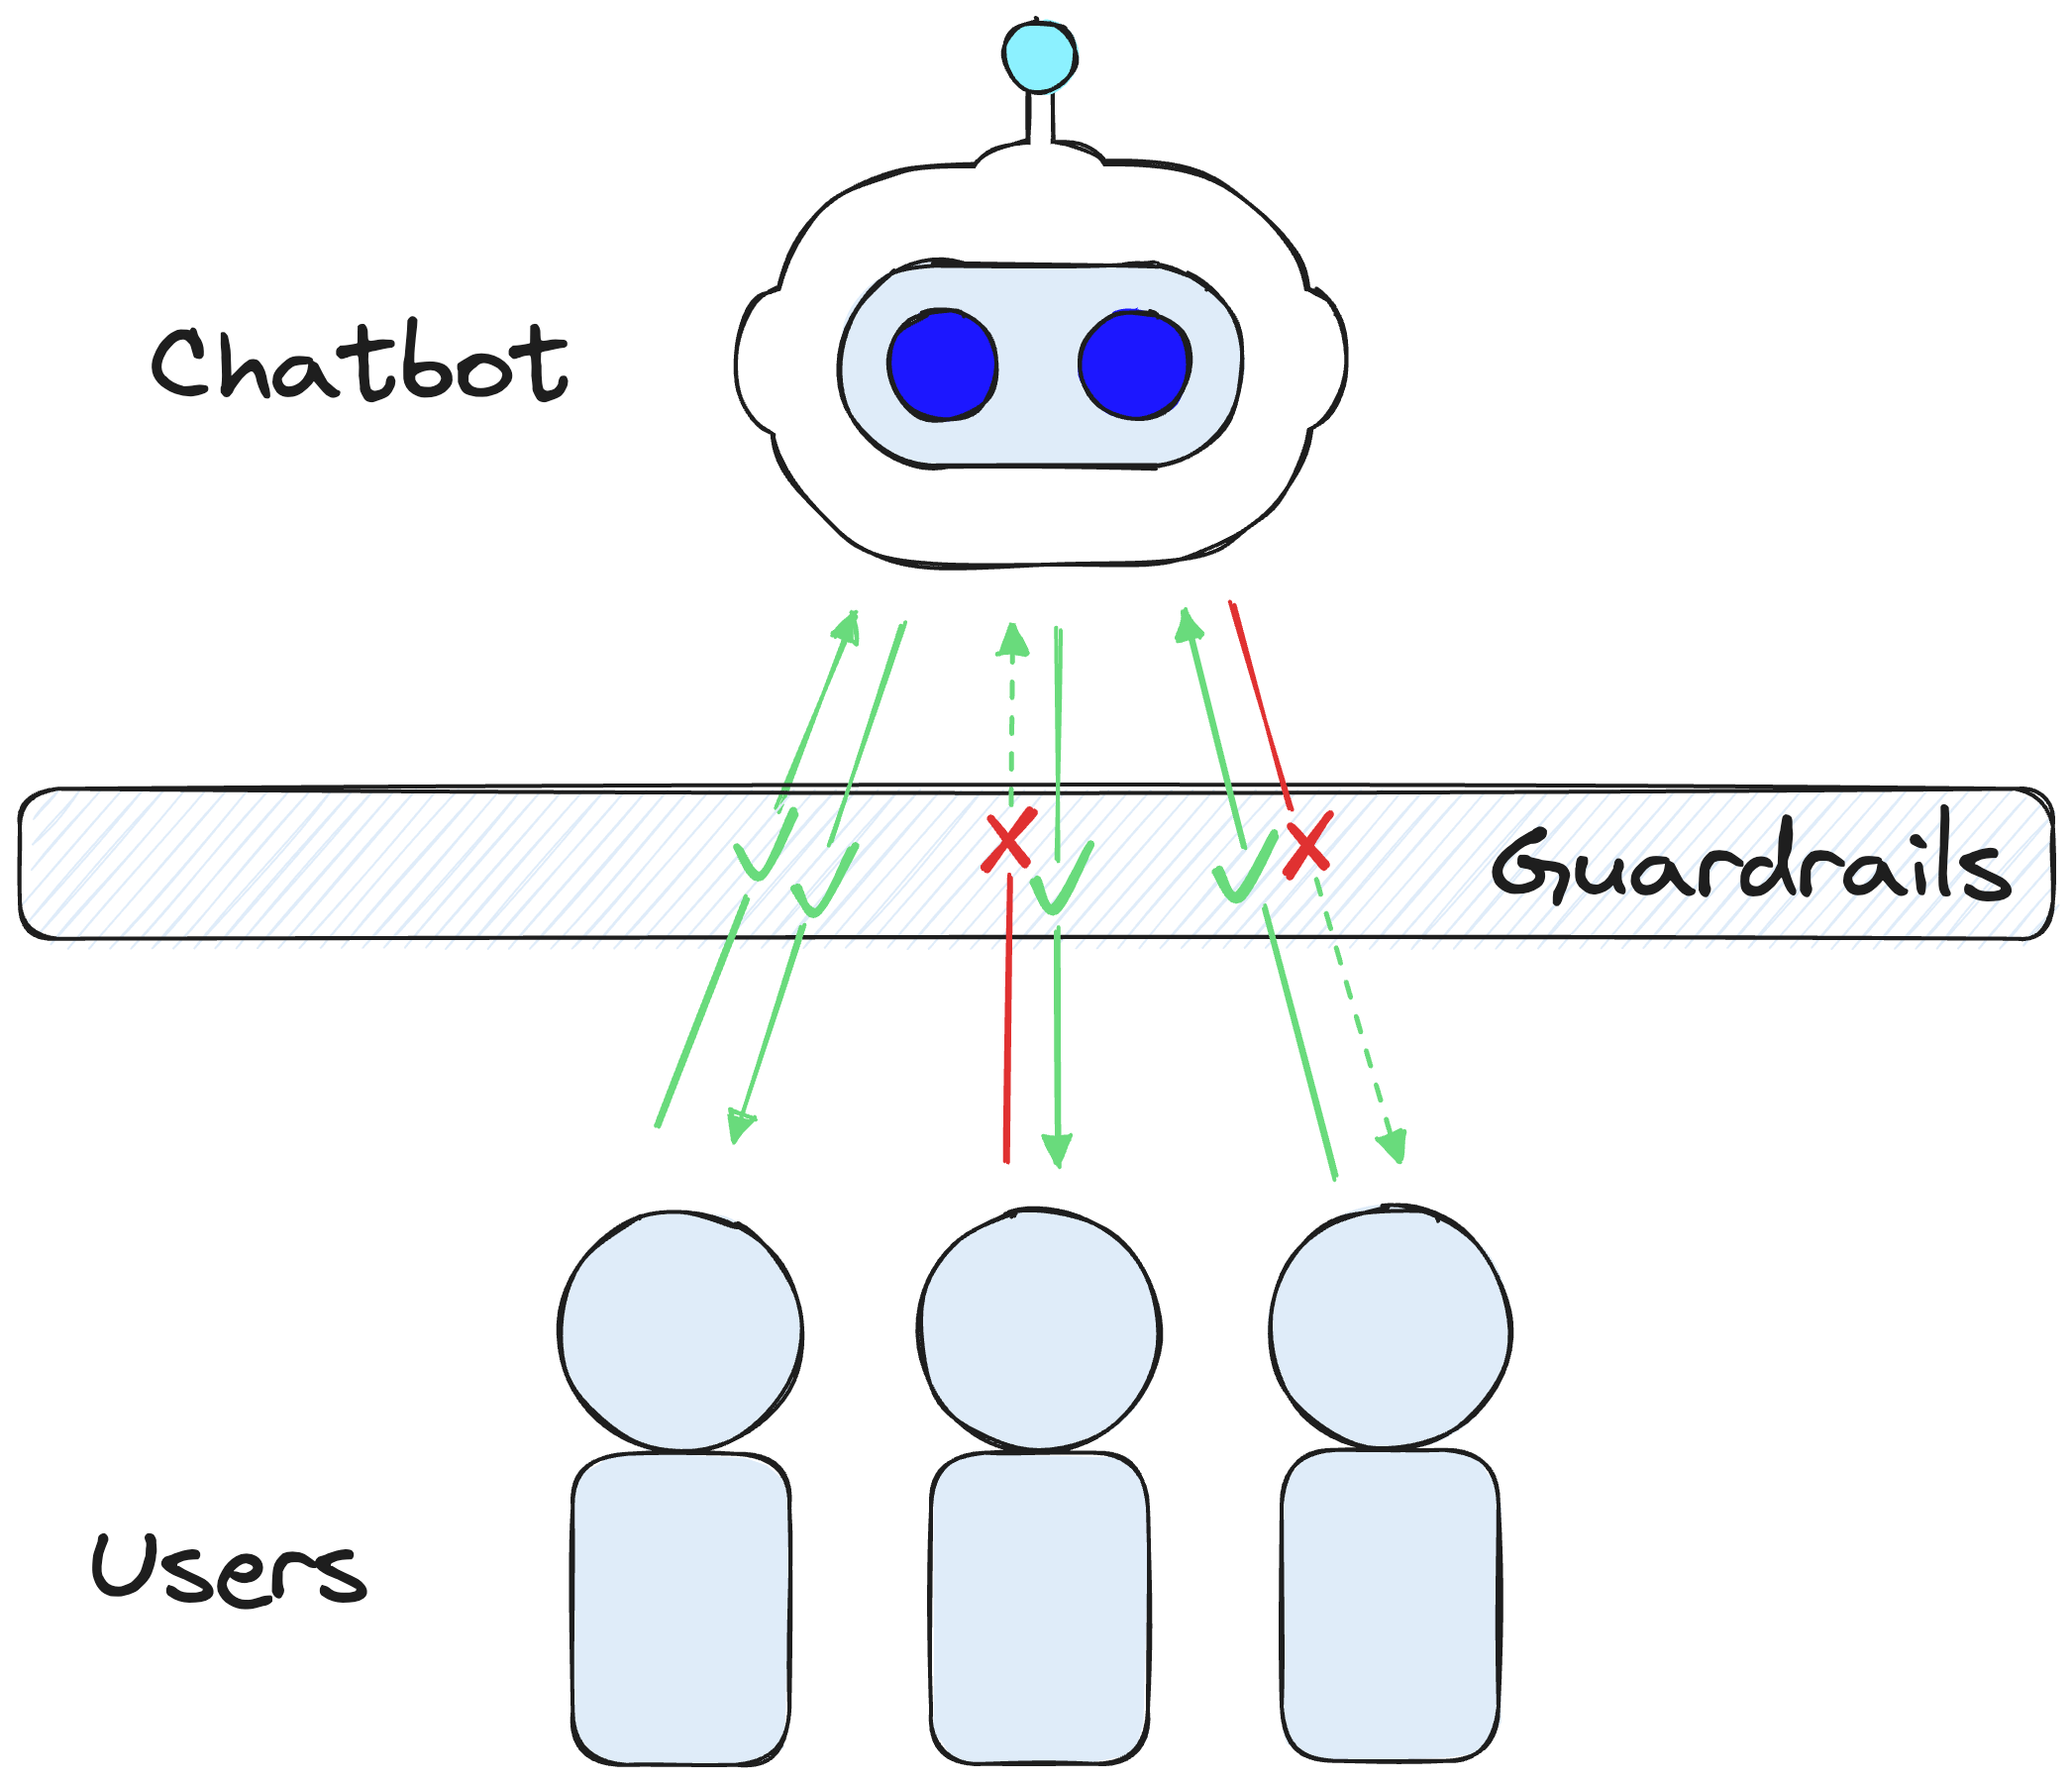

## Usecases:

####Safety and Topic Guidance
The first and foremost use case for NeMo Guardrails is their safety use case. We can apply Guardrails as a layer between users and our chatbot to check for malicious or unwanted input/output and filter those out or react with a set response or action.

For example, if we're an online furniture store, we don't want our users to be using our online chatbot for advice on where to book their next holiday. That isn't the intended use.

#### Deterministic Dialogue
Another use case, which is simply an extension of the above, is adding more deterministic dialogue flows to our chatbots.
This set dialogue flow is how developers built chatbots traditionally. When you would go to an online customer service chat, there would be a set number of questions you could choose from.

By itself, this approach is restrictive and unnatural. Yet, this is a good solution when a user has a common problem because a dialogue flow already exists for their issue. They can follow along, there's no chance of hallucinations, and they'll likely get a quick solution.

Guardrails allows us to do both. We can have deterministic dialogue flows to cover users' most common dialogue paths. At the same time, we can also have the flexibility of generative conversational AI.

#### Retrieval Augmented Generation
Another use case is Guardrails for Retrieval Augmented Generation (RAG), where we can feed additional information into our LLMs to help keep it connected to the outside world and limit hallucinations.

* A large part of the power of Guardrails is Colang— the purpose-built language utilized by NeMo Guardrails.

In [ ]:
import os
os.mkdir("Guardrails")

In [ ]:
os.mkdir("Guardrails/config")

In [ ]:
%%writefile /content/Guardrails/config/config.yml
instructions:
- type: general
  content: |
    Below is a conversation between a personal shopping assistant and
    a user.

models:
- type: main
  engine: openai
  model: gpt-3.5-turbo
  temperature : 0

Overwriting /content/Guardrails/config/config.yml


## Colang file

* Colang is a mini-language built specifically for developing dialogue flows and safety guardrails for conversational systems.
* If defines all of our gaurdrail behaviour

In [ ]:
%%writefile /content/Guardrails/config/topics.co
# define niceties
define user express greeting
    "hello"
    "hi"
    "what's up?"

define flow greeting
    user express greeting
    bot express greeting
    bot ask how are you

# define limits
define user ask politics
    "what are your political beliefs?"
    "thoughts on the president?"
    "left wing"
    "right wing"

define bot answer politics
    "I'm a shopping assistant, I don't like to talk of politics."

define flow politics
    user ask politics
    bot answer politics
    bot offer help

Writing /content/Guardrails/config/topics.co


## Install necessary packages

In [1]:
! pip install -qU nemoguardrails==0.4.0 openai==0.27.8

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 60.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 49.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 56.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 54.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 49.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
!pip install -qU langchain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 19.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
nemoguardrails 0.4.0 requires langchain==0.0.251, but you have langchain 0.0.285 which is incompatible.


In [7]:
import os
from getpass import getpass
import openai
#
os.environ["OPENAI_API_KEY"] = getpass("Enter openai api key ...")

Enter openai api key ...··········


## Load the config file
```

# initialize rails config
config = RailsConfig.from_content(
  	yaml_content=yaml_content,
    colang_content=colang_content
)
# create rails
rails = LLMRails(config)
     

```

In [5]:
from langchain.chat_models import ChatOpenAI
from langchain.llms import OpenAI
llm = ChatOpenAI(model="gpt-3.5-turbo",
                 max_tokens=256,
                 temperature=0)

In [ ]:
from nemoguardrails import LLMRails, RailsConfig
#
config = RailsConfig.from_path(config_path="/content/Guardrails/config")
#
# create rails
rails = LLMRails(config,llm=llm)

## From here, we begin asking questions and interacting with our Guardrails protected LLM.

In [ ]:
# Define role and question to be asked
new_message = await rails.generate_async(prompt="Hello!")
print(new_message)

Hello! How can I assist you today?
Bot intent: ask how are you
Bot message: "Hello! How can I assist you today? How are you doing?"


In [ ]:
messages = [
    {"role": "context", "content": {"name": "James"}},
    {"role": "assistant",
     "content": "Hi! How are you? Is there anything I can help with?"},
    {"role": "user", "content": "what do you think of the president?"}
]


In [ ]:
res = await rails.generate_async(messages=messages)
print(res)

{'role': 'assistant', 'content': "As an AI assistant, I don't have personal opinions or feelings. My purpose is to assist you with any questions or tasks you have. Is there anything specific you would like assistance with?"}


## RAG Pipeline using Nemo Gaurdrails

In [1]:
! pip uninstall protobuf python3-protobuf
! pip install --upgrade pip
! pip install --upgrade protobuf

Found existing installation: protobuf 4.24.3
Uninstalling protobuf-4.24.3:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/google/_upb/_message.abi3.so
    /usr/local/lib/python3.10/dist-packages/google/protobuf/*
    /usr/local/lib/python3.10/dist-packages/protobuf-4.24.3.dist-info/*
Proceed (Y/n)? Y
  Successfully uninstalled protobuf-4.24.3
  Obtaining dependency information for protobuf from https://files.pythonhosted.org/packages/bb/c3/6a06208ecf0934ecaf509b51c52a6cf688586f54ae81ac65c56124571494/protobuf-4.24.3-cp37-abi3-manylinux2014_x86_64.whl.metadata
  Using cached protobuf-4.24.3-cp37-abi3-manylinux2014_x86_64.whl.metadata (540 bytes)
Using cached protobuf-4.24.3-cp37-abi3-manylinux2014_x86_64.whl (311 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.14.0 requires protobuf<4.21,>=3.20.3, but you have protobuf 4.24.

In [1]:
! pip install -qU openai langchain  transformers tiktoken  sentence-transformers qdrant-client

In [68]:
! pip install chromadb

  Obtaining dependency information for chromadb from https://files.pythonhosted.org/packages/ac/92/9abbb58e8b334a3c2aeca828bff8b034ea68a1947d898f3b42ae3c00ce1f/chromadb-0.4.9-py3-none-any.whl.metadata
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Obtaining dependency information for posthog>=2.4.0 from https://files.pythonhosted.org/packages/a7/73/35758818228c70348be4c3c66a76653c62e894e0e3c3461453c5341ca926/posthog-3.0.2-py2.py3-none-any.whl.metadata
  Obtaining dependency information for pulsar-client>=3.1.0 from https://files.pythonhosted.org/packages/b7/54/ef01474b40f70f59b459497bdd48a28fc582c0cde1914fa3efa53053a23e/pulsar_client-3.3.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for onnxruntime>=1.14.1 from https://files.pythonhosted.org/packages/2f/e2/ced4e64433097cb14425098ce3c6200b83d226005e8c23ba5bac44c89ab9/onnxruntime-1.15.1-cp31

## Import Necessary packages

In [2]:
from qdrant_client import models, QdrantClient
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.document_loaders.csv_loader import CSVLoader
from langchain.vectorstores.qdrant import Qdrant
from langchain.vectorstores import Chroma
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.chains import RetrievalQA
from langchain.llms import OpenAI
from langchain.chat_models import ChatOpenAI
from langchain import PromptTemplate
#
from tqdm.auto import tqdm
from uuid import uuid4
from transformers import pipeline
from sentence_transformers import SentenceTransformer, util
import numpy as np
import pandas as pd
from time import time,sleep
import openai
import tiktoken
#
import os
import json
#
import io

## Dowload data and read the content

In [3]:
loader = CSVLoader(file_path='/content/Medical_QA.csv',source_column="link")
data = loader.load()
print(data[0])

page_content='Disease: Acanthosis nigricans\nSymptoms: Skin changes are the only signs of acanthosis nigricans. Youll notice dark thickened velvety skin in body folds and creases — typically in your armpits groin and back of the neck. The skin changes usually appear slowly. The affected skin may also have an odor or itch. Consult your doctor if you notice changes in your skin — especially if the changes appear suddenly. You may have an underlying condition that needs treatment.\nCauses: Acanthosis nigricans has been associated with:    Insulin resistance. Most people who have acanthosis nigricans have also become resistant to insulin. Insulin is a hormone secreted by the pancreas that allows your body to process sugar. Insulin resistance is what eventually causes type 2 diabetes. Hormonal disorders. Acanthosis nigricans often occurs in people who have disorders such as ovarian cysts underactive thyroids or problems with the adrenal glands. Certain drugs and supplements. High-dose niaci

## Guardrails
We now need to initialize our configs for Rails:

In [97]:
yaml_content = """
models:
- type: main
  engine: openai
  model: gpt-3.5-turbo-16k
"""

rag_colang_content = """
# define limits
define user ask doctor
    "Can you refer me to a doctor?"
    "thoughts on the best doctor or physician available to treat the symptoms?"

define bot answer doctor
    "I'm a Medical Symptoms analyzer assistant, I can only suggest the name of the disease associated with probable symptoms ."
    "Sorry I can't recommend a doctor!"

define flow doctor
    user ask doctor
    bot answer doctor
    bot offer help
#
define user ask medicine
    "Can you prescribe a medicine?"
    "thoughts on the best medicine available to treat the symptoms?"

define bot answer doctor
    "I'm a Medical Symptoms analyzer assistant, I can only suggest any medicine for the treatment associated with probable symptoms ."
    "Sorry I can't rprescribe a medicine.Please get in touch with a Medical practioner!"

define flow medicine
    user ask medicine
    bot answer medicine
    bot offer help"
# Basic guardrail against insults.
define flow
  user express insult
  bot express calmly willingness to help
# define RAG intents and flow
define user ask symptoms
    "tell me about my symptoms?"
    "what is disease associated with my symptoms"
    "where did is the probable cause of these symtoms?"
    "how to treat these symptoms?"

# Here we use the QA chain for anything else.
define flow
  user ...
  $answer = execute qa_chain(query=$last_user_message)
  bot $answer
"""

no_rag_colang_content = """
# define limits
define user ask doctor
    "Can you refer me to a doctor?"
    "thoughts on the best doctor or physician available to treat the symptoms?"

define bot answer doctor
    "I'm a Medical Symptoms analyzer assistant, I can only suggest the name of the disease associated with probable symptoms ."
    "Sorry I can't recommend a doctor!"

define flow doctor
    user ask doctor
    bot answer doctor
    bot offer help
#
define user ask medicine
    "Can you prescribe a medicine?"
    "thoughts on the best medicine available to treat the symptoms?"

define bot answer doctor
    "I'm a Medical Symptoms analyzer assistant, I can only suggest any medicine for the treatment associated with probable symptoms ."
    "Sorry I can't rprescribe a medicine.Please get in touch with a Medical practioner!"

define flow medicine
    user ask medicine
    bot answer medicine
    bot offer help"
# Basic guardrail against insults.
define flow
  user express insult
  bot express calmly willingness to help
"""

* It executes the retrieve action using the $last_user_message to get our $contexts, we then pass the $last_user_message and $contexts to our rag action. We initialize our RAG-enabled rails with this Colang setup:

## Text Embeddings

In [8]:
embeddings = HuggingFaceEmbeddings(model_kwargs = {'device': 'cpu'},
                                    encode_kwargs = {'normalize_embeddings': False})

## Instantiate LLM

In [9]:
llm=ChatOpenAI(model_name='gpt-3.5-turbo-16k',
               openai_api_key=os.environ["OPENAI_API_KEY"],
               max_tokens =200,
               temperature=0)

##  Prepare Metadata and content to be stored in vectorstore

In [37]:
metadatas = []
text_data = []
for row in data:
  metadatas.append(row.metadata)
  text_data.append(row.page_content)
print(len(metadatas),len(text_data))

1106 1106


## Build the vectore store and store the text vector along with metadata

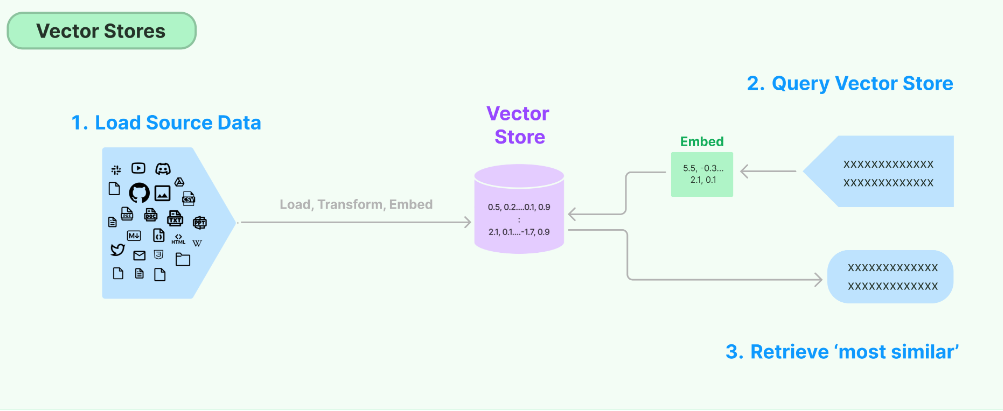

* One of the most common ways to store and search over unstructured data is to embed it and store the resulting embedding vectors, and then at query time to embed the unstructured query and retrieve the embedding vectors that are 'most similar' to the embedded query. A vector store takes care of storing embedded data and performing vector search for you.

* There are many great vector store options, here are a few that are free, open-source, and run entirely on your local machine. (Chroma,
FAISS,
Lance )

In [11]:
text_data[0]

'Disease: Acanthosis nigricans\nSymptoms: Skin changes are the only signs of acanthosis nigricans. Youll notice dark thickened velvety skin in body folds and creases — typically in your armpits groin and back of the neck. The skin changes usually appear slowly. The affected skin may also have an odor or itch. Consult your doctor if you notice changes in your skin — especially if the changes appear suddenly. You may have an underlying condition that needs treatment.\nCauses: Acanthosis nigricans has been associated with:    Insulin resistance. Most people who have acanthosis nigricans have also become resistant to insulin. Insulin is a hormone secreted by the pancreas that allows your body to process sugar. Insulin resistance is what eventually causes type 2 diabetes. Hormonal disorders. Acanthosis nigricans often occurs in people who have disorders such as ovarian cysts underactive thyroids or problems with the adrenal glands. Certain drugs and supplements. High-dose niacin birth contr

In [12]:
metadatas[0]

{'source': 'https://www.mayoclinic.org/diseases-conditions/acanthosis-nigricans/symptoms-causes/syc-20368983',
 'row': 0}

## Chunk the documents

In [41]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=5000, chunk_overlap=200)
texts = text_splitter.split_documents(data)

In [34]:
len(texts)

1717

In [42]:
texts[-1].metadata['source']

'https://www.mayoclinic.org/diseases-conditions/digeorge-syndrome/symptoms-causes/syc-20353543'

In [30]:
metadata = [{"source": f"{texts[i].metadata['source']}"} for i in range(len(texts))]

In [47]:
%%time
doc_store = Chroma.from_documents(texts, embeddings)

CPU times: user 35min 41s, sys: 7min 29s, total: 43min 11s
Wall time: 44min 21s


In [48]:
res = embeddings.embed_query("My 12 year old son has Poor coordination Unsteady walk and a tendency to stumble while walking and poor coordination between two hands.What might be the possible cuase?")

In [51]:
len(res)

768

In [52]:
context = doc_store.similarity_search_by_vector(res,k=5)

In [54]:
context[0]

Document(page_content='Disease: Palsy, cerebral (See: Palsy, cerebral, also known asCerebral palsy)\nSymptoms: Signs and symptoms can vary greatly. Movement and coordination problems associated with cerebral palsy include: Cerebral palsy can affect the whole body or it might be limited primarily to one limb or one side of the body. The brain disorder causing cerebral palsy doesnt change with time so the symptoms usually dont worsen with age. However as the child gets older some symptoms might become more or less apparent. And muscle shortening and muscle rigidity can worsen if not treated aggressively. Brain abnormalities associated with cerebral palsy might also contribute to other neurological problems including: Its important to get a prompt diagnosis for a movement disorder or delays in your childs development. See your childs doctor if you have concerns about episodes of loss of awareness of surroundings or of abnormal bodily movements abnormal muscle tone impaired coordination sw

In [55]:
async def retrieve(query: str) -> list:
    # create query embedding
    res = embeddings.embed_query(query)
    # get relevant contexts from pinecone
    contexts = doc_store.similarity_search_by_vector(res,k=5)
    return contexts

In [171]:
from langchain import LLMChain

In [204]:
async def rag(query: str, contexts: list) -> str:
    print("> RAG Called")  # we'll add this so we can see when this is being used
    print(len(contexts))
    contexts = [item.page_content for item in contexts]
    print(len(contexts))
    context_str = "\n".join(contexts)
    # place query and contexts into RAG prompt
    prompt = f"""You are a helpful assistant, below is a query from a user and
    some relevant contexts. Answer the question given the information in those
    contexts. If you cannot find the answer to the question, say "I don't know".

    Contexts:
    {context_str}

    Query: {query}

    Answer: """
    # generate answer
    #
    #messages = [{"role":"user","content":query}]
    #print(prompt)
    llm = ChatOpenAI( model="gpt-3.5-turbo-16k",temperature=0,)
    result = llm.predict(query)
    return result

## Define New Gaurdrails

In [135]:
yaml_ctnt = """
models:
- type: main
  engine: openai
  model: gpt-3.5-turbo-16k
"""

rag_colang = """
# define limits
define user ask doctor
    "Can you refer me to a doctor?"
    "thoughts on the best doctor or physician available to treat the symptoms?"

define bot answer doctor
    "I'm a Medical Symptoms analyzer assistant, I can only suggest the name of the disease associated with probable symptoms ."
    "Sorry I can't recommend a doctor!"

define flow doctor
    user ask doctor
    bot answer doctor
    bot offer help
#
define user ask medicine
    "Can you prescribe a medicine?"
    "thoughts on the best medicine available to treat the symptoms?"

define bot answer doctor
    "I'm a Medical Symptoms analyzer assistant, I can only suggest any medicine for the treatment associated with probable symptoms ."
    "Sorry I can't rprescribe a medicine.Please get in touch with a Medical practioner!"

define flow medicine
    user ask medicine
    bot answer medicine
    bot offer help"
# Basic guardrail against insults.
define flow
  user express insult
  bot express calmly willingness to help
# define RAG intents and flow
define flow
    user ...
    $contexts = execute retrieve(query=$last_user_message)
    $answer = execute rag(query=$last_user_message, contexts=$contexts)
    bot $answer
"""

In [205]:
# initialize rails config
config = RailsConfig.from_content(
    colang_content=rag_colang,
    yaml_content=yaml_ctnt
)
# create rails
ragrails = LLMRails(config,llm=llm)

* We need to register any actions that are used in the Colang config file, otherwise our rails have no idea how to execute retrieve or execute rag. We register both like so:

In [206]:
ragrails.register_action(action=retrieve, name="retrieve")
ragrails.register_action(action=rag, name="rag")

In [169]:
questions = input("Please provide the symptoms here :")
print(questions)

Please provide the symptoms here :My 12 year old son has Poor coordination Unsteady walk and a tendency to stumble while walking and poor coordination between two hands.What might be the possible cuase?
My 12 year old son has Poor coordination Unsteady walk and a tendency to stumble while walking and poor coordination between two hands.What might be the possible cuase?


In [203]:
await ragrails.generate_async(questions)

> RAG Called
5
5
You are a helpful assistant, below is a query from a user and
    some relevant contexts. Answer the question given the information in those
    contexts. If you cannot find the answer to the question, say "I don't know".

    Contexts:
    Disease: Palsy, cerebral (See: Palsy, cerebral, also known asCerebral palsy)
Symptoms: Signs and symptoms can vary greatly. Movement and coordination problems associated with cerebral palsy include: Cerebral palsy can affect the whole body or it might be limited primarily to one limb or one side of the body. The brain disorder causing cerebral palsy doesnt change with time so the symptoms usually dont worsen with age. However as the child gets older some symptoms might become more or less apparent. And muscle shortening and muscle rigidity can worsen if not treated aggressively. Brain abnormalities associated with cerebral palsy might also contribute to other neurological problems including: Its important to get a prompt diagnosis f

"I'm not a doctor, but there are several potential causes for the symptoms you described in your son. It's important to consult with a healthcare professional for an accurate diagnosis. Some possible causes could include:\n\n1. Developmental coordination disorder (DCD): This is a condition that affects motor skills and coordination. Children with DCD may have difficulty with tasks such as tying shoelaces, catching a ball, or using utensils.\n\n2. Muscular dystrophy: This is a group of genetic disorders that cause progressive muscle weakness and loss of muscle mass. Some types of muscular dystrophy can affect coordination and balance.\n\n3. Cerebral palsy: This is a neurological disorder that affects movement and muscle coordination. It can be caused by brain damage before, during, or after birth.\n\n4. Sensory processing disorder: This condition affects how the brain processes sensory information, which can impact coordination and balance.\n\n5. Inner ear problems: Issues with the inne

In [207]:
await ragrails.generate_async("Can you prescribe medicine for DCD?")

> RAG Called
5
5


"I'm sorry, but as an AI language model, I cannot prescribe medication. Only qualified healthcare professionals, such as doctors or psychiatrists, can prescribe medication for specific conditions like Developmental Coordination Disorder (DCD). If you or someone you know is experiencing symptoms of DCD, it is important to consult with a healthcare professional who can evaluate the situation and provide appropriate recommendations or treatment options."

## mode == "chain_with_guardrails"

In [65]:
history = []
history.append({"role": "user", "content": questions})
bot_message = await rails.generate_async(messages=history)
history.append(bot_message)
print(history)

ERROR:nemoguardrails.actions.action_dispatcher:Error 'coroutine' object has no attribute 'run' while execution qa_chain
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/nemoguardrails/actions/action_dispatcher.py", line 149, in execute_action
    result = fn.run(**params)
AttributeError: 'coroutine' object has no attribute 'run'


[{'role': 'user', 'content': 'My 12 year old son has Poor coordination Unsteady walk and a tendency to stumble while walking and poor coordination between two hands.What might be the possible cuase?'}, {'role': 'assistant', 'content': "I'm sorry, an internal error has occurred."}]


## RAG Actions with Nemo Gaurdrails

In [91]:
def _get_qa_chain(llm):
    """Initializes a QA chain using the jobs report.

    It uses OpenAI embeddings.
    """
    qa_chain = RetrievalQA.from_chain_type(
        llm=llm, chain_type="stuff", retriever=doc_store.as_retriever()
    )

    return qa_chain

In [92]:
def _get_qa_chain_bk(llm):
    """Initializes a QA chain using the jobs report.

    It uses OpenAI embeddings.
    """
    loader = CSVLoader(file_path='/content/Medical_QA.csv',source_column="link")
    data = loader.load()
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=5000, chunk_overlap=200)
    texts = text_splitter.split_documents(data)

    embeddings = HuggingFaceEmbeddings(model_kwargs = {'device': 'cpu'},
                                    encode_kwargs = {'normalize_embeddings': False})
    docsearch = Chroma.from_documents(texts, embeddings)

    qa_chain = RetrievalQA.from_chain_type(
        llm=llm, chain_type="stuff", retriever=docsearch.as_retriever()
    )

    return qa_chain

In [99]:
config = RailsConfig.from_content(rag_colang_content, yaml_content)
app = LLMRails(config,llm=llm)

In [100]:
qa_chain = _get_qa_chain(app.llm)
app.register_action(qa_chain, name="qa_chain")

In [95]:
# mode == "chain"
result = qa_chain(questions)
print(result['result'])

Based on the symptoms you described, it is possible that your son may be experiencing ataxia. Ataxia is a neurological disorder that can cause poor coordination, an unsteady walk, difficulty with fine motor tasks, and a lack of coordination between limbs. However, it is important to consult with a healthcare professional for a proper diagnosis and to rule out any other potential causes.


## Without gaurdrails

In [101]:
config = RailsConfig.from_content(no_rag_colang_content, yaml_content)
no_app = LLMRails(config,llm=llm)

In [102]:
result = qa_chain("can you prescribe medicine for the symptoms?")
print(result['result'])

I'm sorry, but as an AI language model, I cannot prescribe medication. Only a qualified healthcare professional, such as a doctor or psychiatrist, can prescribe medication after evaluating your symptoms and conducting a proper diagnosis. It's important to consult with a healthcare provider for appropriate medical advice and treatment.


In [104]:
await no_app.generate_async("can you prescribe medicine for the symptoms?")

"Sorry, I can't prescribe medicine. Please get in touch with a medical practitioner for that.\nYou're welcome. If you have any more questions or if there's anything else I can help you with, please don't hesitate to ask."

In [105]:
await no_app.generate_async(questions)

'Based on the symptoms you described, it is possible that your son may be experiencing a condition called developmental coordination disorder (DCD). DCD is a neurological disorder that affects motor skills and coordination. It is more common in children and can manifest as difficulties with balance, coordination, and fine motor skills. However, it is important to consult with a medical professional for a proper diagnosis and to rule out any other underlying conditions.'

In [103]:
# mode == "chain"
result = qa_chain(questions)
print(result['result'])

Based on the symptoms you described, it is possible that your son may be experiencing ataxia. Ataxia is a neurological disorder that can cause poor coordination, an unsteady walk, difficulty with fine motor tasks, and a lack of coordination between limbs. However, it is important to consult with a healthcare professional for a proper diagnosis and to rule out any other potential causes.


In [208]:
result = qa_chain("Can you prescribe medicines for Ataxia?")
print(result['result'])

As an AI language model, I cannot prescribe medications. Only a qualified healthcare professional, such as a doctor or neurologist, can prescribe medications for ataxia. The specific treatment for ataxia depends on the underlying cause and may involve medications to manage symptoms or treat the underlying condition. It is important to consult with a healthcare professional for an accurate diagnosis and appropriate treatment plan.


## With guardrails

In [107]:
# mode == "chain_with_guardrails":
history = [{"role": "user", "content": questions}]
#
result = await app.generate_async(messages=history)
print(result['content'])

Based on the symptoms you described, it is possible that your son may be experiencing ataxia. Ataxia is a neurological disorder that can cause poor coordination, an unsteady walk, difficulty with fine motor tasks, and a lack of coordination between limbs. However, it is important to consult with a healthcare professional for a proper diagnosis and to rule out any other potential causes.


In [108]:
history = [{"role": "user", "content": "can you prescribe medicine for the symptoms?"}]
#
result = await app.generate_async(messages=history)
print(result['content'])

Sorry, I can't prescribe medicine. Please get in touch with a medical practitioner for that.
You're welcome. If you have any more questions or if there's anything else I can help you with, please don't hesitate to ask.


In [110]:
history = [{"role": "user", "content": "who is the best doctor to treat ataxia?"}]
#
result = await app.generate_async(messages=history)
print(result['content'])

I'm a Medical Symptoms analyzer assistant, I can only suggest the name of the disease associated with probable symptoms .
If you're looking for a doctor to treat ataxia, I'm sorry but I can't recommend a specific doctor. However, I can provide information about ataxia and its symptoms. If you have any specific questions or need more information, feel free to ask!


In [210]:
# mode == "chat_with_guardrails":
history = []
user_message = " "
while True and user_message !="bye":
  user_message = input("> ")

  history.append({"role": "user", "content": user_message})
  bot_message = await app.generate_async(messages=history)
  history.append(bot_message)

  # We print bot messages in green.
  print(f"\033[92m{bot_message['content']}\033[0m")

> My 12 year old son has Poor coordination Unsteady walk and a tendency to stumble while walking and poor coordination between two hands.What might be the possible cuase?
Based on the symptoms you described, it is possible that your son may be experiencing ataxia. Ataxia is a neurological disorder that can cause poor coordination, an unsteady walk, difficulty with fine motor tasks, and a lack of coordination between limbs. However, it is important to consult with a healthcare professional for a proper diagnosis and to rule out any other potential causes.
> Can you advise me on the medication?
I'm sorry, but as an AI assistant, I cannot prescribe medication. It is important to consult with a healthcare professional who can properly diagnose your son's condition and recommend appropriate treatment options.
You're welcome. If you have any more questions or if there's anything else I can help you with, please don't hesitate to ask.
> Who is the best doctor in town to treat Ataxia?
Sorry I 